In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from tqdm.auto import tqdm
import math
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

tqdm.pandas()

rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

In [2]:
df= pd.read_csv('/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv')

In [3]:
# summary table function
def summary(df):
    # Print the shape of the DataFrame
    print(f'data shape: {df.shape}')  
    # Create a summary DataFrame
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    # Calculate the number of missing values
    summ['#missing'] = df.isnull().sum().values 
    # Calculate the percentage of missing values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    # Calculate the number of unique values
    summ['#unique'] = df.nunique().values
    # Create a descriptive DataFrame
    desc = pd.DataFrame(df.describe(include='all').transpose())
    # Add the minimum, maximum, and first three values to the summary DataFrame
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    # Return the summary DataFrame
    return summ

In [4]:
 summary(df)

data shape: (308854, 19)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
General_Health,object,0,0.0,5,NaN,NaN,Poor,Very Good,Very Good
Checkup,object,0,0.0,5,NaN,NaN,Within the past 2 years,Within the past year,Within the past year
Exercise,object,0,0.0,2,NaN,NaN,No,No,Yes
Heart_Disease,object,0,0.0,2,NaN,NaN,No,Yes,No
Skin_Cancer,object,0,0.0,2,NaN,NaN,No,No,No
Other_Cancer,object,0,0.0,2,NaN,NaN,No,No,No
Depression,object,0,0.0,2,NaN,NaN,No,No,No
Diabetes,object,0,0.0,4,NaN,NaN,No,Yes,Yes
Arthritis,object,0,0.0,2,NaN,NaN,Yes,No,No
Sex,object,0,0.0,2,NaN,NaN,Female,Female,Female


In [5]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [6]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()
# Fit and transform the data

df['Diabetes'] = le.fit_transform(df['Diabetes'])
df['Depression'] = le.fit_transform(df['Depression'])
df['Other_Cancer'] = le.fit_transform(df['Other_Cancer'])
df['Skin_Cancer'] = le.fit_transform(df['Skin_Cancer'])
df['Exercise'] = le.fit_transform(df['Exercise'])
df['Checkup'] = le.fit_transform(df['Checkup'])
df['General_Health'] = le.fit_transform(df['General_Health'])
df['Heart_Disease'] = le.fit_transform(df['Heart_Disease'])
df['Arthritis'] = le.fit_transform(df['Arthritis'])
df['Smoking_History'] = le.fit_transform(df['Smoking_History'])
df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [9]:
# Update 'Age_Category' column with average values, handling "80+" separately
df['Age_Category'] = df['Age_Category'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 if '-' in x else int(x.split('+')[0]))

In [10]:
df['Age_Category']

0         72.0
1         72.0
2         62.0
3         77.0
4         80.0
          ... 
308849    27.0
308850    67.0
308851    32.0
308852    67.0
308853    47.0
Name: Age_Category, Length: 308854, dtype: float64

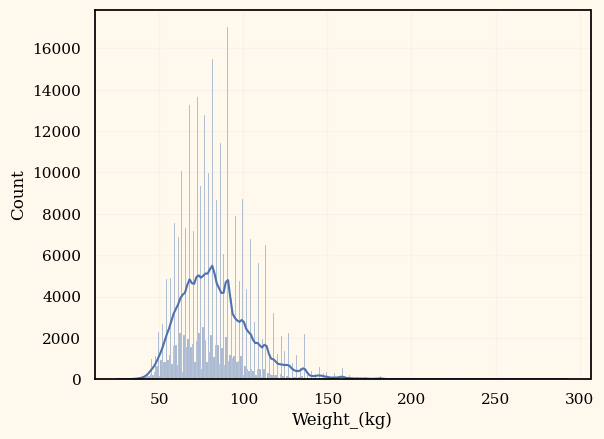

In [11]:
# let's check the distribution of target variable

sns.histplot(df, x="Weight_(kg)", kde=True)
plt.show()

In [12]:
# select numerical and categorical variables respectively.
num_cols = df.select_dtypes(include=['float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
all_features = num_cols + cat_cols

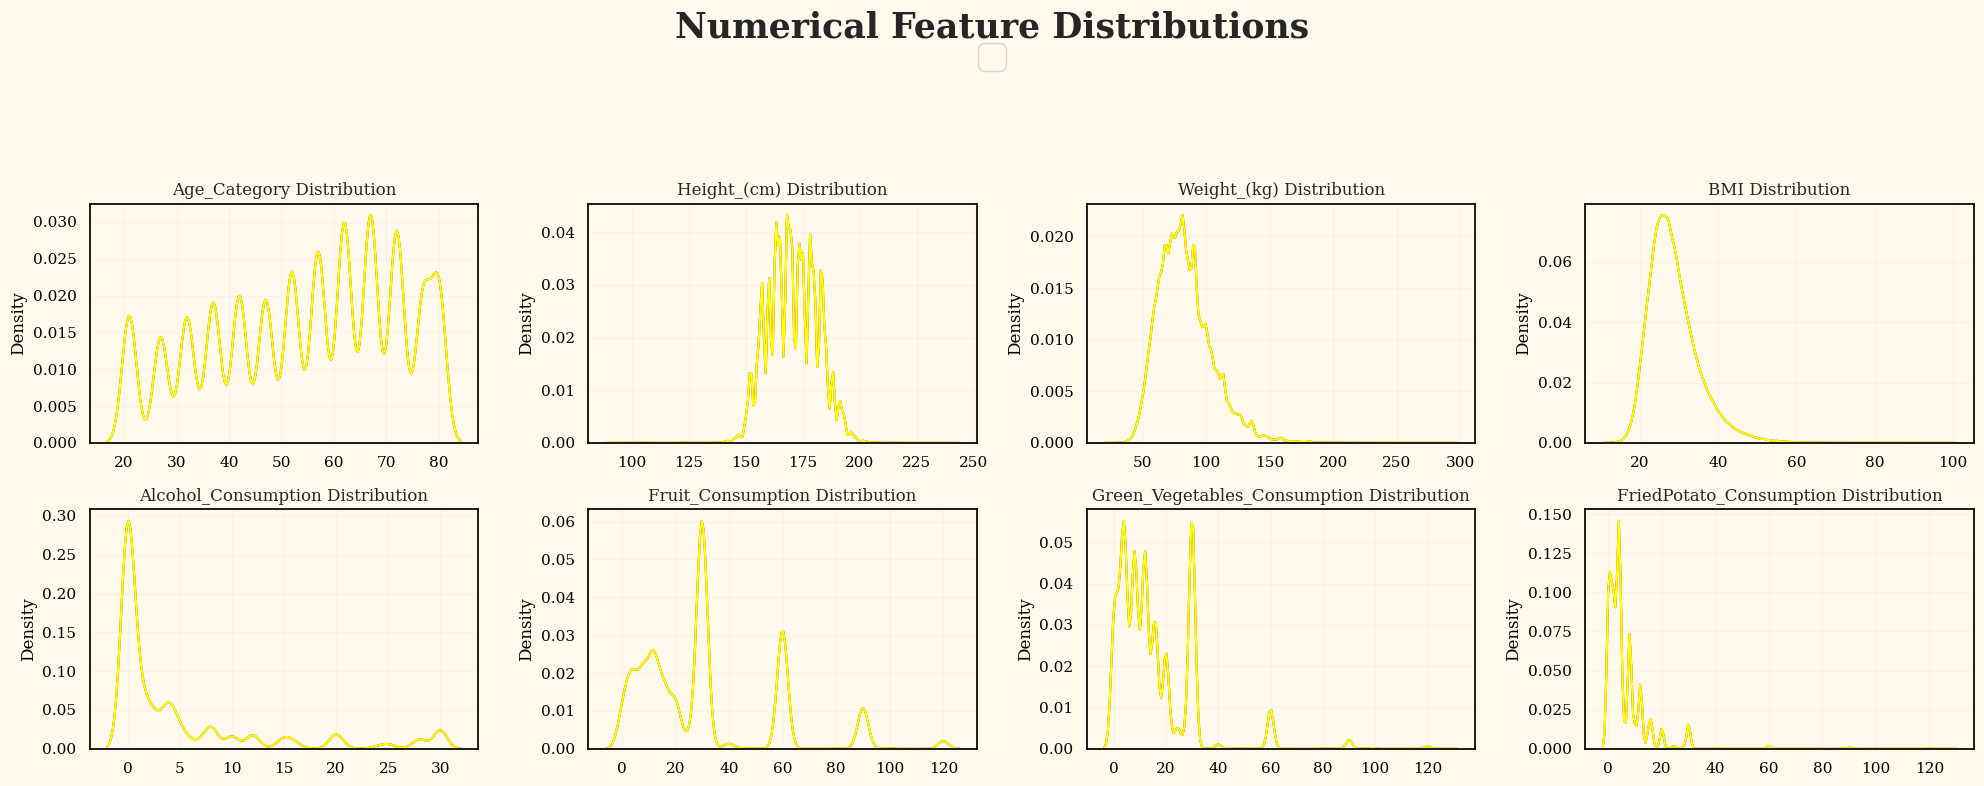

In [13]:
# check numerical variables' distribution

features = num_cols
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    sns.kdeplot(
        df[column],
        ax=ax[i], color='#9E3F00'
    )
    
    sns.kdeplot(
        df[column],
        ax=ax[i], color='yellow'
    )
    
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    
fig.suptitle(f'Numerical Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=25, ncol=3)
plt.tight_layout()

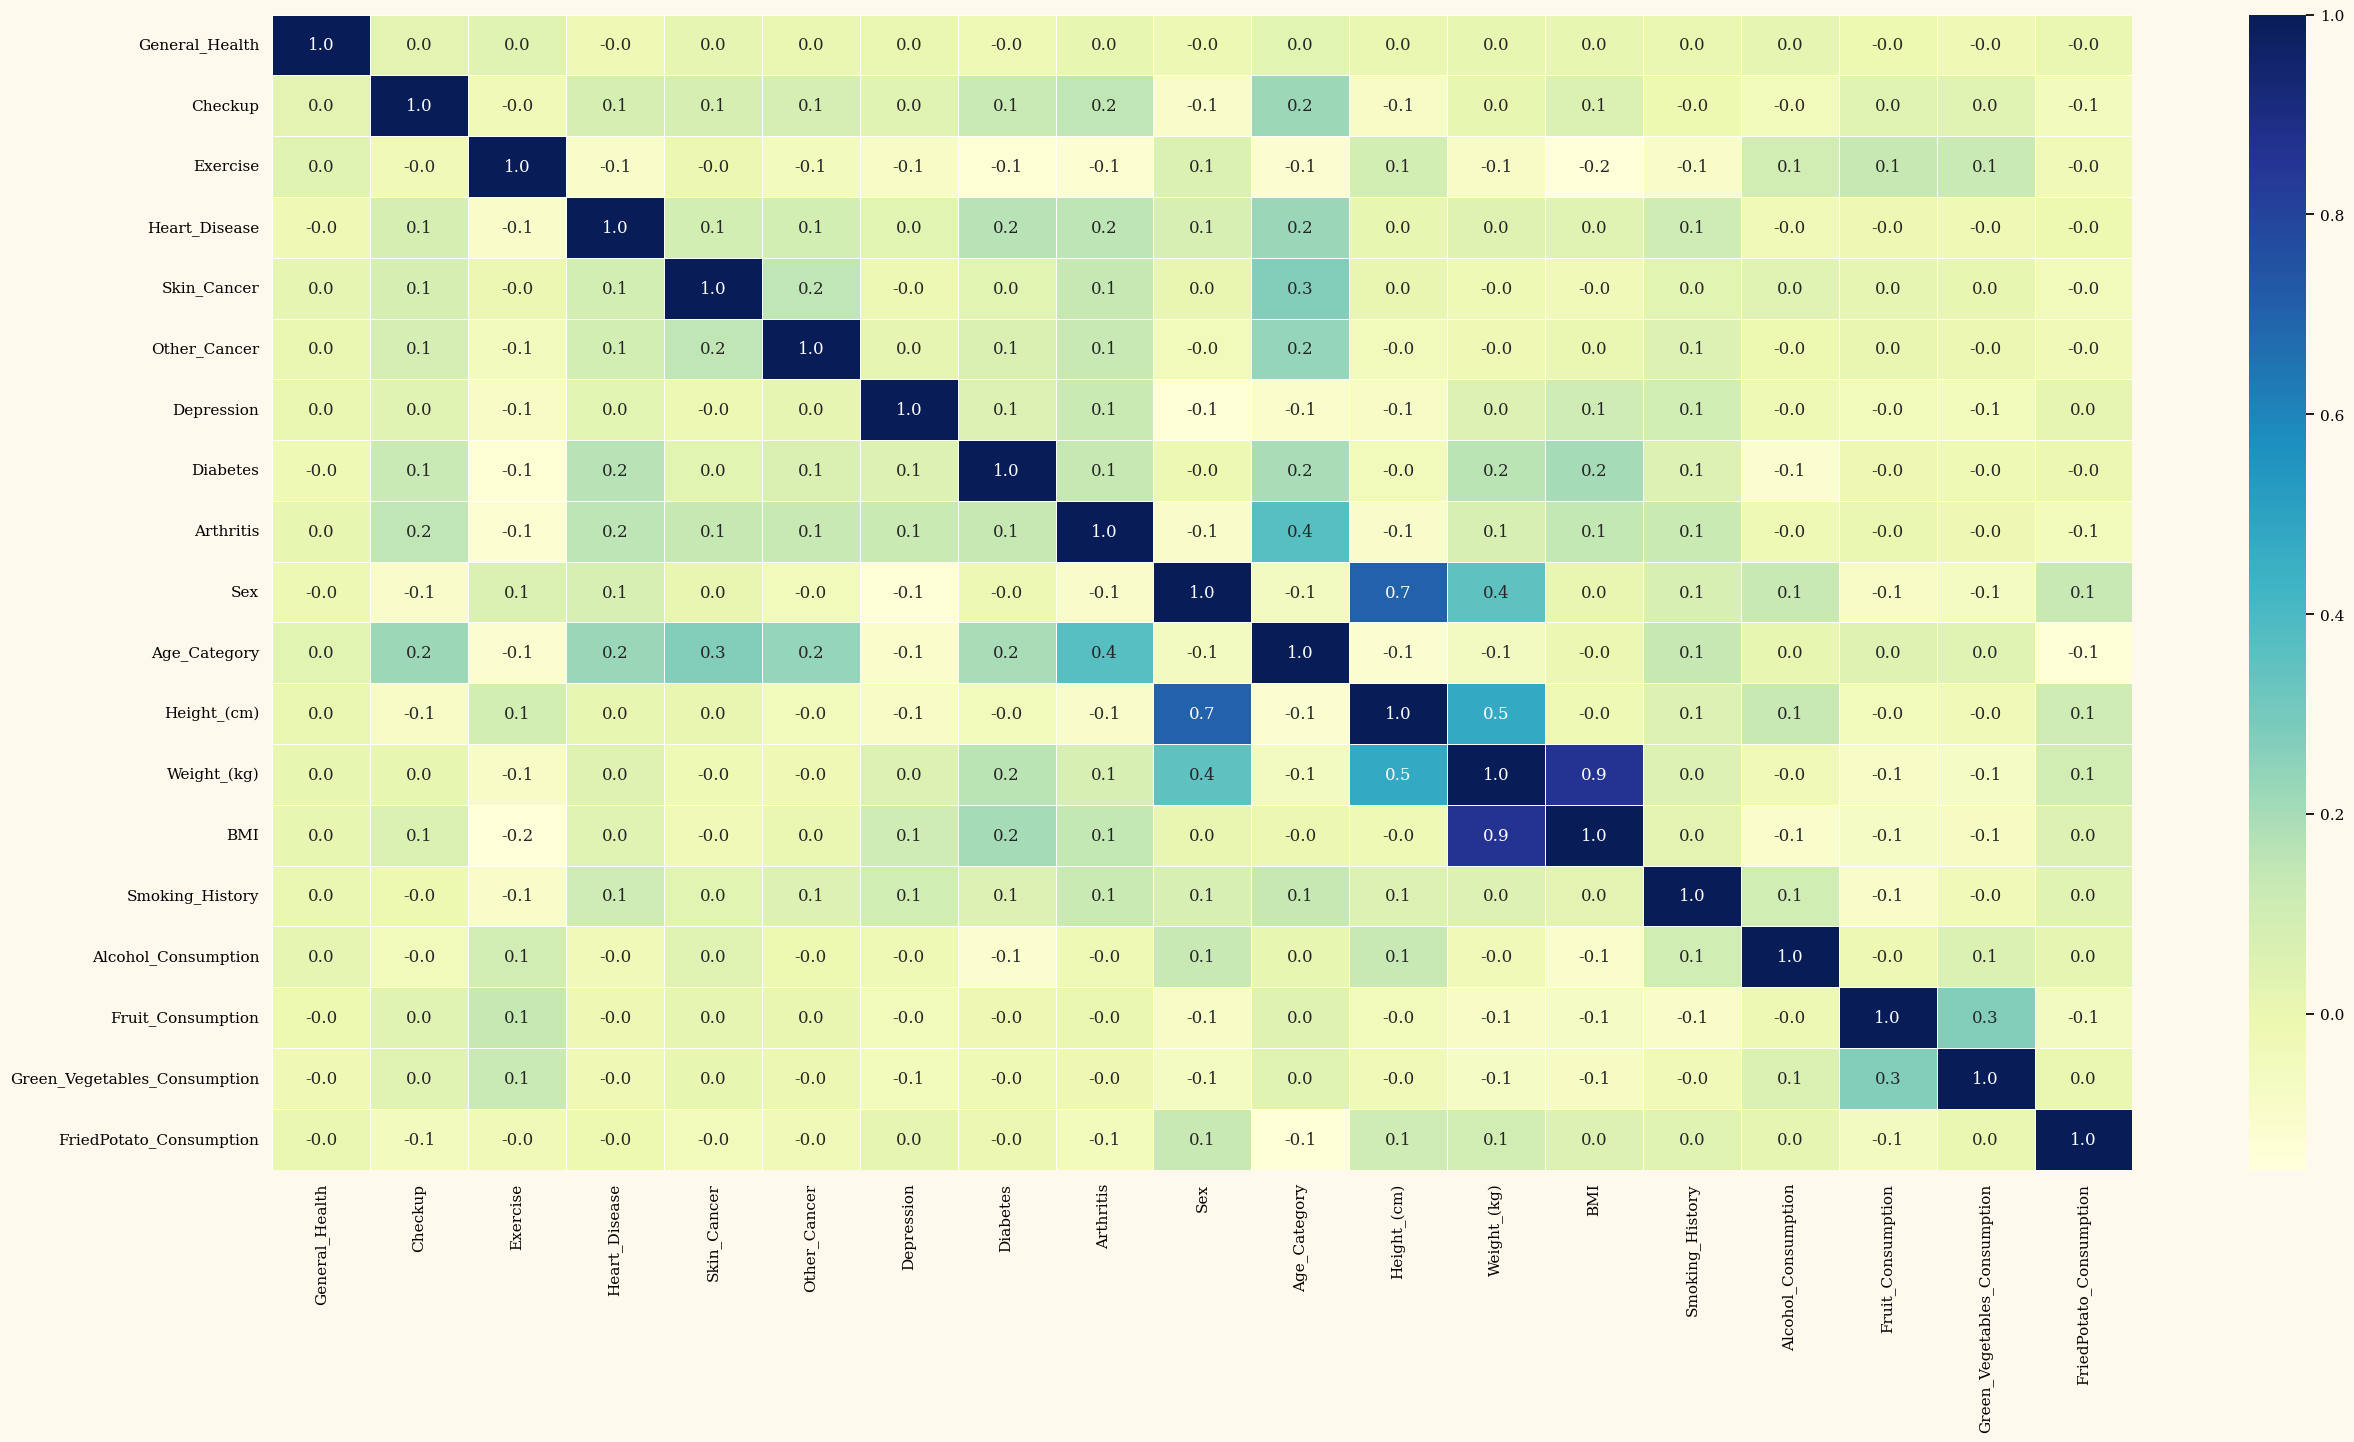

In [14]:
# Correlation matrix
corr = df.corr()
#print(corr)
# Heatmap
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.heatmap(corr,annot=True, linewidths=.5, fmt='.1f', cmap='YlGnBu')

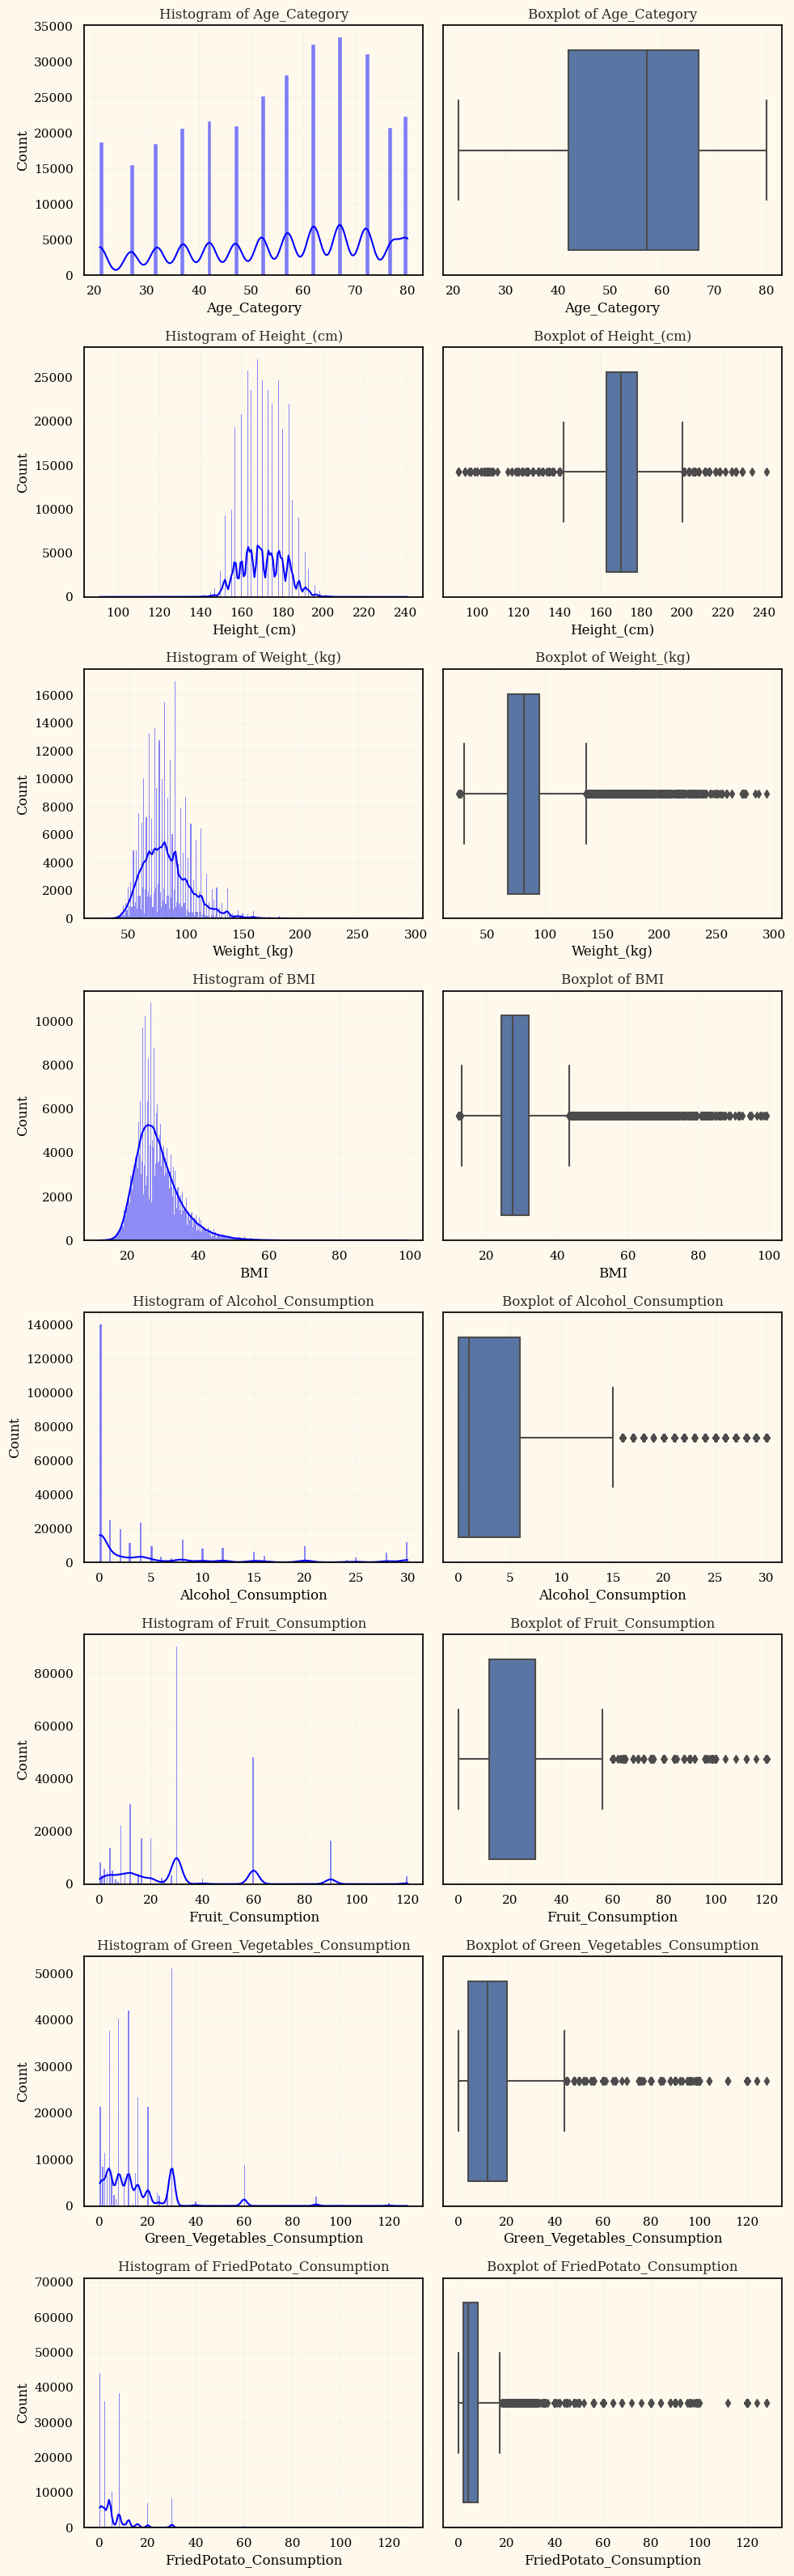

In [15]:
num_cols_count = len(num_cols)
n_rows = num_cols_count

fig, axs = plt.subplots(n_rows, 2, figsize=(10, n_rows*4))

for idx, col in enumerate(num_cols):

    # Plot histogram
    sns.histplot(data=df, x=col, kde=True, ax=axs[idx, 0], color='blue')
    axs[idx, 0].set_title(f'Histogram of {col}')

    # Plot boxplot
    sns.boxplot(data=df, x=col, ax=axs[idx, 1])
    axs[idx, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [16]:
y = df['Heart_Disease']


In [17]:

from sklearn.utils import class_weight
from sklearn import metrics

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int64  
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  Age_Category                  308854 non-null  float64
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [20]:

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [21]:
from catboost import CatBoostClassifier
clfs = []

scores = []
kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, val_index in kf.split(df, y=y):
    X_train, X_val = df[:].loc[train_index],df[:].loc[val_index]
    y_train, y_val = y[train_index],y[val_index]

    clf = CatBoostClassifier(iterations=200)
    clf.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)
    
    preds = clf.predict_proba(X_val.values)[:, 1]
    clfs.append(clf)
    scores.append(roc_auc_score(y_val, preds))
print(f'mean auc across all folds: {np.mean(scores)}')

mean auc across all folds: 1.0


In [22]:
test_preds = []

for clf in clfs:
    preds = clf.predict_proba(df[:].values)
    test_preds.append(preds[:, 1])

In [23]:
test_preds = np.stack(test_preds).mean(0)


In [24]:
df['Heart_Disease_pd']= test_preds

<Axes: >

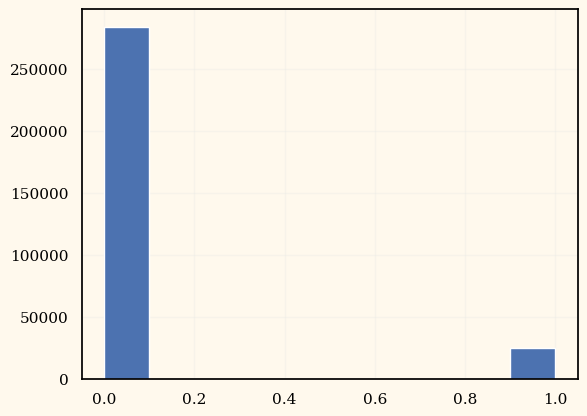

In [25]:
df['Heart_Disease'].hist()


<Axes: >

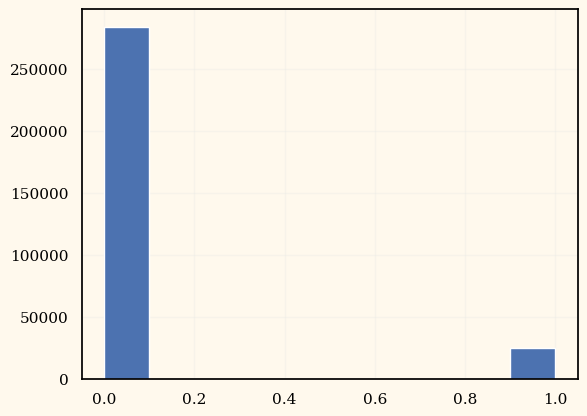

In [26]:
df['Heart_Disease_pd'].hist()